<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/encoder_4_33_23_1_18_Muhammad_Rafif_Pasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib numpy


In [2]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential

In [3]:
# Muat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


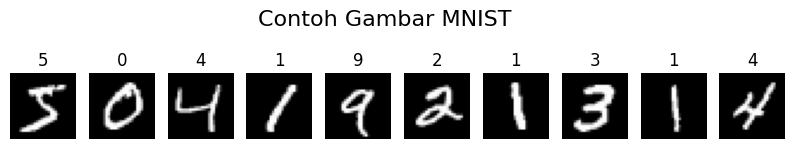

In [4]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Contoh Gambar MNIST", fontsize=16)
plt.show()

In [5]:
# Tambahkan noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [6]:
# Bangun arsitektur autoencoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 222ms/step - loss: 0.2673 - val_loss: 0.1248
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 209ms/step - loss: 0.1233 - val_loss: 0.1151
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 210ms/step - loss: 0.1148 - val_loss: 0.1116
Epoch 4/10
355/469 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - loss: 0.1106

In [ ]:
# Visualisasi hasil rekonstruksi
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Asli
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Asli")
    plt.axis("off")

    # Bising
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Bising")
    plt.axis("off")

    # Rekonstruksi
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Rekonstruksi")
    plt.axis("off")
plt.show()



In [ ]:
# Visualisasi neuron yang paling aktif
encoder = Model(autoencoder.input, encoded)
encoded_imgs = encoder.predict(x_test)
flat_encodings = encoded_imgs.reshape(encoded_imgs.shape[0], -1)
most_activated = np.argmax(flat_encodings, axis=0)


In [ ]:
plt.figure(figsize=(15, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    idx = most_activated[i]
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Neuron {i}')
    plt.axis('off')
plt.show()


1.debgan pretraining


In [ ]:
# Ambil 500 data untuk pelatihan
x_small = x_train[:500]
y_small = to_categorical(y_train[:500], 10)
y_test_cat = to_categorical(y_test, 10)

# 1. Klasifikasi dengan encoder hasil pretraining
pretrained_encoder = Model(autoencoder.input, encoded)
pretrained_model = Sequential([
    pretrained_encoder,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Melatih model dengan pretraining...")
pretrained_model.fit(x_small, y_small, epochs=20, validation_data=(x_test, y_test_cat), verbose=2)


2. tanpa pretraining

In [ ]:
non_pretrained_model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
non_pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Melatih model tanpa pretraining...")
non_pretrained_model.fit(x_small, y_small, epochs=20, validation_data=(x_test, y_test_cat), verbose=2)